# Part I - Prosper Loan Data Exploratory Analysis
## by Victor Oguche

## Introduction
The Prosper Loan dataset is a collection of loan records.
Using the Prosper Loan dataset, Exploratory and Explanatory analysis will be carried out with the aim of finding trends, patterns and insight from the loan dataset.

To achieve this, the following questions will be answered in the analysis:

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Functions 

In [179]:
#
def boxgrid(x, y, **kwargs):
    """creating box plots with seaborn's PairGrid."""
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

## Assessing Data
Assessing collected dataset

In [3]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [4]:
df_loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Drop columns not needed in the exploration and analysis
df_loan = df_loan.drop(['ListingKey','ListingNumber',
'ScorexChangeAtTimeOfListing',
'ListingCreationDate',
'CreditGrade',
'ClosedDate',
'ProsperRating (numeric)',
'EmploymentStatusDuration',
'CurrentlyInGroup',
'GroupKey',
'DateCreditPulled',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'FirstRecordedCreditLine',
'CurrentCreditLines',
'OpenCreditLines',
'TotalCreditLinespast7years',
'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment',
'InquiriesLast6Months',
'TotalInquiries',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'RevolvingCreditBalance',
'BankcardUtilization',
'TotalTrades',
'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months',
'LoanKey',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanNumber',
'LoanOriginationDate',
'LoanOriginationQuarter',
'MemberKey',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_InterestandFees',
'LP_ServiceFees',
'LP_CollectionFees',
'LP_GrossPrincipalLoss',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
], axis = 1)

In [7]:
# view stat of retained columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Term                                 113937 non-null  int64  
 1   LoanStatus                           113937 non-null  object 
 2   BorrowerAPR                          113912 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              84853 non-null   float64
 6   EstimatedLoss                        84853 non-null   float64
 7   EstimatedReturn                      84853 non-null   float64
 8   ProsperRating (Alpha)                84853 non-null   object 
 9   ProsperScore                         84853 non-null   float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  BorrowerState

### Quality issues
- Erroneous datatypes
- prosper loan value for TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed and ProsperPrincipalOutstanding  was null if the borrower has no prior loans. This is to be set to zero.
- listing category is numeric. while they are classification. The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [80]:
# make a copy of dataset for cleaning
df_loan_clean = df_loan.copy()

### Issue:
Erroneous datatypes

### Define:
Correct the datatype for 
LoanStatus, 
ProsperRating, 
ListingCategory, 
EmploymentStatus, 
CurrentDelinquencies, 
DelinquenciesLast7Years, 
TotalProsperLoans, 
TotalProsperPaymentsBilled, 
OnTimeProsperPayments, 
ProsperPaymentsLessThanOneMonthLate, 
ProsperPaymentsOneMonthPlusLate, 
LoanOriginalAmount


### Code:

In [81]:
# Change wrong datatype
df_loan_clean['CurrentDelinquencies'] = df_loan_clean['CurrentDelinquencies'].astype(int, errors ='ignore')
df_loan_clean['DelinquenciesLast7Years'] = df_loan_clean['DelinquenciesLast7Years'].astype(int, errors ='ignore')
df_loan_clean['TotalProsperLoans'] = df_loan_clean['TotalProsperLoans'].astype(int, errors ='ignore')
df_loan_clean['TotalProsperPaymentsBilled'] = df_loan_clean['TotalProsperPaymentsBilled'].astype(int, errors ='ignore')
df_loan_clean['OnTimeProsperPayments'] = df_loan_clean['OnTimeProsperPayments'].astype(int, errors ='ignore')
df_loan_clean['ProsperPaymentsLessThanOneMonthLate'] = df_loan_clean['ProsperPaymentsLessThanOneMonthLate'].astype(int, errors ='ignore')
df_loan_clean['ProsperPaymentsOneMonthPlusLate'] = df_loan_clean['ProsperPaymentsOneMonthPlusLate'].astype(int, errors ='ignore')
df_loan_clean['LoanOriginalAmount'] = df_loan_clean['LoanOriginalAmount'].astype(float, errors ='ignore')

In [82]:
#change datatype
df_loan_clean['ListingCategory (numeric)'] = df_loan_clean['ListingCategory (numeric)'].astype(str)

In [83]:
# convert ordinal columns into ordered categorical types
ordinal_var_dict = {
    'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A','AA'],
    'IncomeRange': ['Not displayed','Not employed', '$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

In [84]:
# convert Nominal columns into categorical types
nominal_var_dict = { 'LoanStatus': ['Current', 'Completed', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],
    'ListingCategory (numeric)': ['0', '1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20'],
    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired'], 'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
    'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Senior', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Religious', 'Homemaker',
       'Student - College Graduate Student', 'Student - Technical School',
       'Psychologist', 'Biologist', 'Student - College Sophomore',
       'Judge', 'Student - College Junior', 'Car Dealer',
       'Student - Community College', 'Student - College Freshman']
}

for var in nominal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype( categories = nominal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

### test:

In [85]:
#test
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Term                                 113937 non-null  int64   
 1   LoanStatus                           113937 non-null  category
 2   BorrowerAPR                          113912 non-null  float64 
 3   BorrowerRate                         113937 non-null  float64 
 4   LenderYield                          113937 non-null  float64 
 5   EstimatedEffectiveYield              84853 non-null   float64 
 6   EstimatedLoss                        84853 non-null   float64 
 7   EstimatedReturn                      84853 non-null   float64 
 8   ProsperRating (Alpha)                84853 non-null   category
 9   ProsperScore                         84853 non-null   float64 
 10  ListingCategory (numeric)            113937 non-null  category
 11  

### Issue:
Null placed instead of zero if the borrower has no prior loans.

### Define:
prosper loan value for TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed and ProsperPrincipalOutstanding was null if the borrower has no prior loans. This is to be set to zero.

### Code:

In [86]:
# from the dataset dictionary, value will be null if the borrower has no prior loans. so set null to zero for prosper based columns
df_loan_clean['TotalProsperLoans'] = df_loan_clean['TotalProsperLoans'].fillna(0)
df_loan_clean['TotalProsperPaymentsBilled'] = df_loan_clean['TotalProsperPaymentsBilled'].fillna(0)
df_loan_clean['OnTimeProsperPayments'] = df_loan_clean['OnTimeProsperPayments'].fillna(0)
df_loan_clean['ProsperPaymentsLessThanOneMonthLate'] = df_loan_clean['ProsperPaymentsLessThanOneMonthLate'].fillna(0)
df_loan_clean['ProsperPaymentsOneMonthPlusLate'] = df_loan_clean['ProsperPaymentsOneMonthPlusLate'].fillna(0)
df_loan_clean['ProsperPrincipalBorrowed'] = df_loan_clean['ProsperPrincipalBorrowed'].fillna(0)
df_loan_clean['ProsperPrincipalOutstanding'] = df_loan_clean['ProsperPrincipalOutstanding'].fillna(0)

### test:

In [87]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Term                                 113937 non-null  int64   
 1   LoanStatus                           113937 non-null  category
 2   BorrowerAPR                          113912 non-null  float64 
 3   BorrowerRate                         113937 non-null  float64 
 4   LenderYield                          113937 non-null  float64 
 5   EstimatedEffectiveYield              84853 non-null   float64 
 6   EstimatedLoss                        84853 non-null   float64 
 7   EstimatedReturn                      84853 non-null   float64 
 8   ProsperRating (Alpha)                84853 non-null   category
 9   ProsperScore                         84853 non-null   float64 
 10  ListingCategory (numeric)            113937 non-null  category
 11  

### Issue:
ListingCategory (numeric) not interpreted in values 

### Define:
Change ListingCategory (numeric) values to the specifications 

### Code:

In [88]:
df_loan_clean['ListingCategory (numeric)'] = df_loan_clean['ListingCategory (numeric)'].replace(['0', '1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20'],
                                                                                               ['Not Available', 
                                                                                                'Debt Consolidation', 
                                                                                                'Home Improvement',  'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 
                                                                                                'Boat',  'Cosmetic Procedure',  'Engagement Ring',  'Green Loans',  'Household Expenses', 
                                                                                                'Large Purchases',  'Medical/Dental',  'Motorcycle',  'RV',  'Taxes',  'Vacation',  'Wedding Loans'])

In [89]:
# rename column
df_loan_clean = df_loan_clean.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'})

### test: 

In [90]:
df_loan_clean['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [91]:
df_loan_clean.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,CurrentDelinquencies,AmountDelinquent,...,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,113240.000000,106315.000000,...,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,5.950067,0.592052,984.507059,...,1642.232196,567.997952,152.816539,8337.01385,272.475783,0.998584,0.048027,0.023460,16.550751,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,2.376501,1.978707,7158.270157,...,4670.954909,2037.268511,466.320254,6245.80058,192.697812,0.017919,0.332353,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1000.00000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4000.00000,131.620000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6500.00000,217.740000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12000.00000,371.580000,1.000000,0.000000,0.000000,0.000000,115.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,11.000000,83.000000,463881.000000,...,72499.000000,23450.950000,2704.000000,35000.00000,2251.510000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The Prosper loan dataset contains 113937 loan records and this analysis will make use of 38 features from the loan dataset. Most variables are numeric while 8 of the features are Nominal data and 3 Ordinal data.

### What is/are the main feature(s) of interest in your dataset?

> From this analysis, I am interested in finding features that are key in determining if a borrower is loan worthy.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 
> I expect that a borrower Stated Monthly Income should impact how much loan they can recieve. Also the Monthly Loan Payment intended is expected to have an impact on the original loan amount. Borrowers with high Prosper score are expected to have good loan history with higher loan original amount though this may not always be the case.

## Univariate Exploration

To start I will like to dive on the LoanOriginalAmount to see the loan amount distribution.



In [92]:
#get an overview statistics of the column
df_loan_clean['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

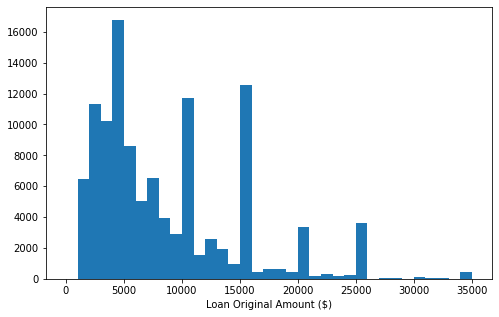

In [151]:
# Distribution view for LoanOriginalAmount
binsize = 1000
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.show()

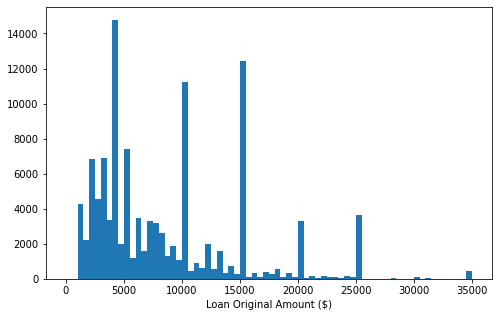

In [154]:
# further investiagtion on smaller bin size
binsize = 500
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.show()

>Observations:
>> There are about 3 major jump in the Loan Original Amount distribution. 
>> The chart is skewed to the right with high concentration on small loan ammount.
>>Let's log transform the Loan Original Amount to get a more granular view of the distribution.

In [152]:
#log transform the column description to get the min max for bins
np.log10(df_loan_clean['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

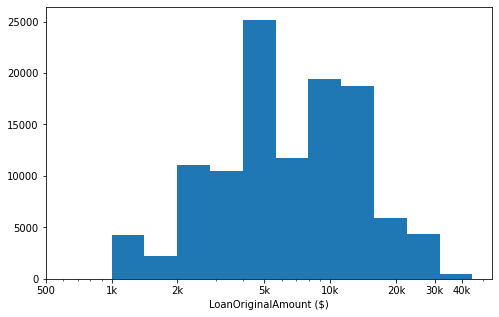

In [95]:
# plot the log transformed 
log_binsize = 0.15
bins = 10 ** np.arange(np.log10(df_loan_clean['LoanOriginalAmount'].min())-log_binsize, np.log10(df_loan_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4,3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('LoanOriginalAmount ($)')
plt.show()

>Observation:
>> The transformed plot shows a bimodal distribution with peak frequency about the 5k and 10k loan amount respectively. 
>> The scale chart shows that a large amount of the loan original amount falls in the middle range. While a very few number of the loan records has high loan original amount. 

Next we will look into the Prosper Rating and Income Range to get the distribution of the loan records on ordinal variables.

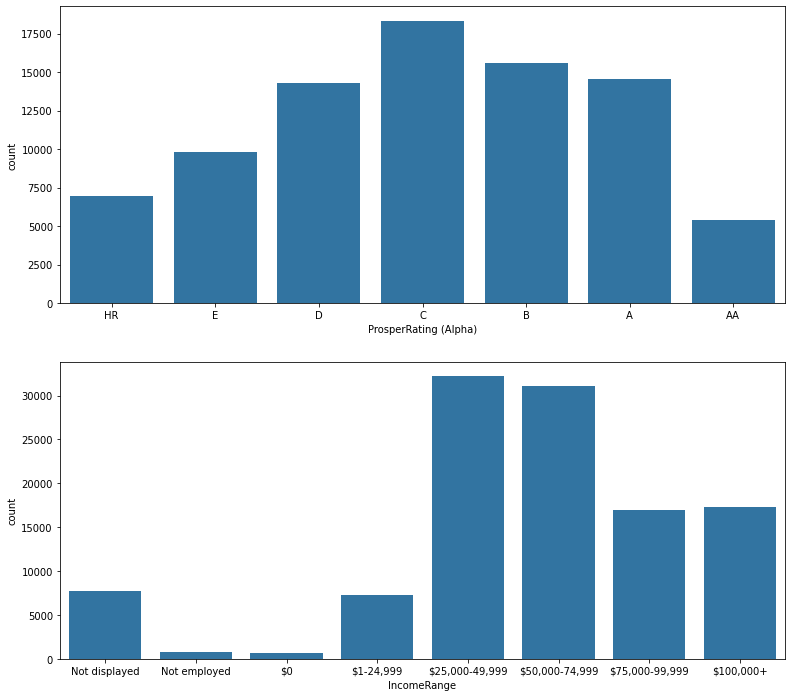

In [104]:
# let's plot the two together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [13,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'IncomeRange', color = default_color, ax = ax[1])

plt.show()

>Observation:
    >> Most of the loan have average prosper rating as seen with a high frequency count for C.
    >> Large amount of the loan records are on borrowers with income range between 25,000 and 75,000 dollars.

Furthermore, Let's veiw the distribution for norminal variables

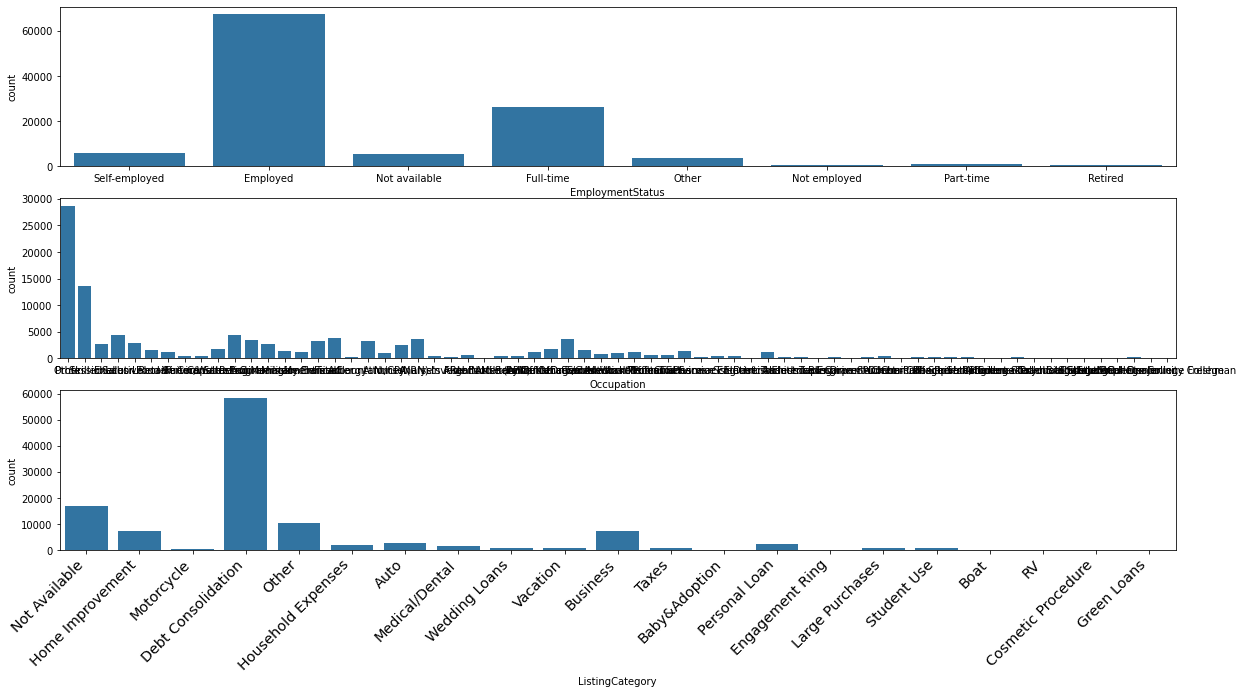

In [108]:
# let's plot occupation and employment status together to get an idea of each norminal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [20,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'ListingCategory', color = default_color, ax = ax[2])
sb.countplot(data = df_loan_clean, x = 'Occupation', color = default_color, ax = ax[1])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

> Observation:
>> Majority of the loans where given for Debt Consolidation. Using the loan to pay off other loans
>> From the norminal plot more loans are given to employed borrower as expected. There is an occupation with very high count in recieving loans. 
To check this we will need to plot the top 5 highest occupation with loans.

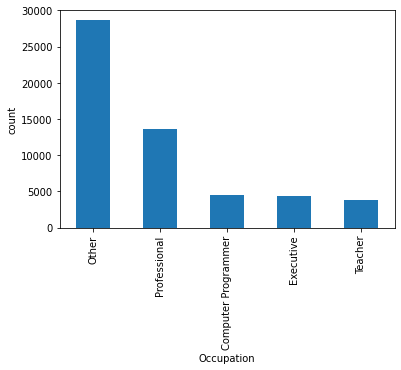

In [155]:
# further plot to get the top 5 occupation recieving loans
df_loan_clean['Occupation'].value_counts().head(5).plot(kind = "bar")
plt.xlabel('Occupation')
plt.ylabel('count')
plt.show()

>> The bulk of the count falls in other category which is expected as many occupations not listed falls in this category.

Let's review the distribution of Stated Monthly Income given by the borrowers

In [157]:
# distribution of StatedMonthlyIncome
#get an overview statistics of the column
df_loan_clean['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

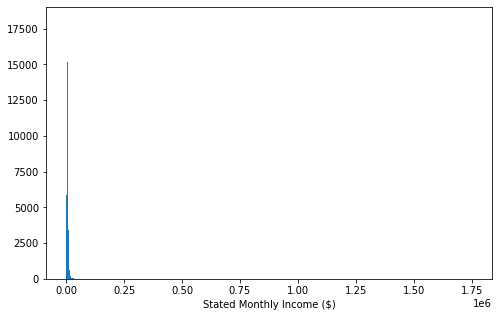

In [158]:
binsize = 1000
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income ($)')
plt.show()

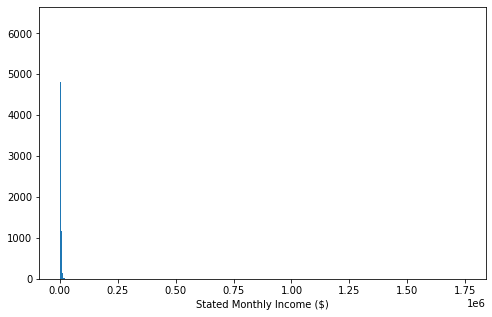

In [159]:
# let's investigate further on smaller bin size
binsize = 250
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income ($)')
plt.show()

>Observation:
>> There is a very large frequency spikes at lower stated monthly income.
Let's trasnform the StatedMonthlyIncome to get a deep view of the distribution

In [147]:
np.log10(df_loan_clean['StatedMonthlyIncome'].describe())

count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

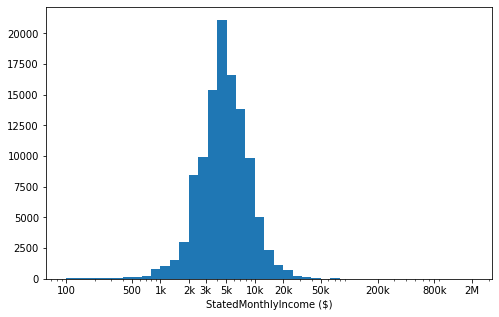

In [160]:
# log transformed plot for deeper investigation 
log_binsize = 0.1
bins = 10 ** np.arange(2, np.log10(df_loan_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([0.1e3,0.5e3, 1e3,2e3,3e3,5e3,10e3,20e3, 50e3, 200e3, 800e3, 2000e3], ['100','500' ,'1k','2k','3k','5k','10k', '20k', '50k', '200k', '800k', '2M'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.show()

> Observation: 
    >> From the chart, Stated Monthly Income has a normal distribution which is expected that loan will be requested more from less earning borrowers while from this number loan will be given more to borrowers with average Stated Monthly Income 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the variables of core interest, Loan Original Amount distribution was skewed to the right and log transformation was needed to give nore details into the distribution. Same occured for Stated Monthly Income which the log transformation showed that the distribution was normal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No adjustment was made to the data used as the variables distribution came out as expected.

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [162]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperScore', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'AvailableBankcardCredit',
       'DebtToIncomeRatio', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded',
       'Recommendations', 'InvestmentFromFriendsCount',
       'InvestmentFromFriendsAmount', 'Investors']

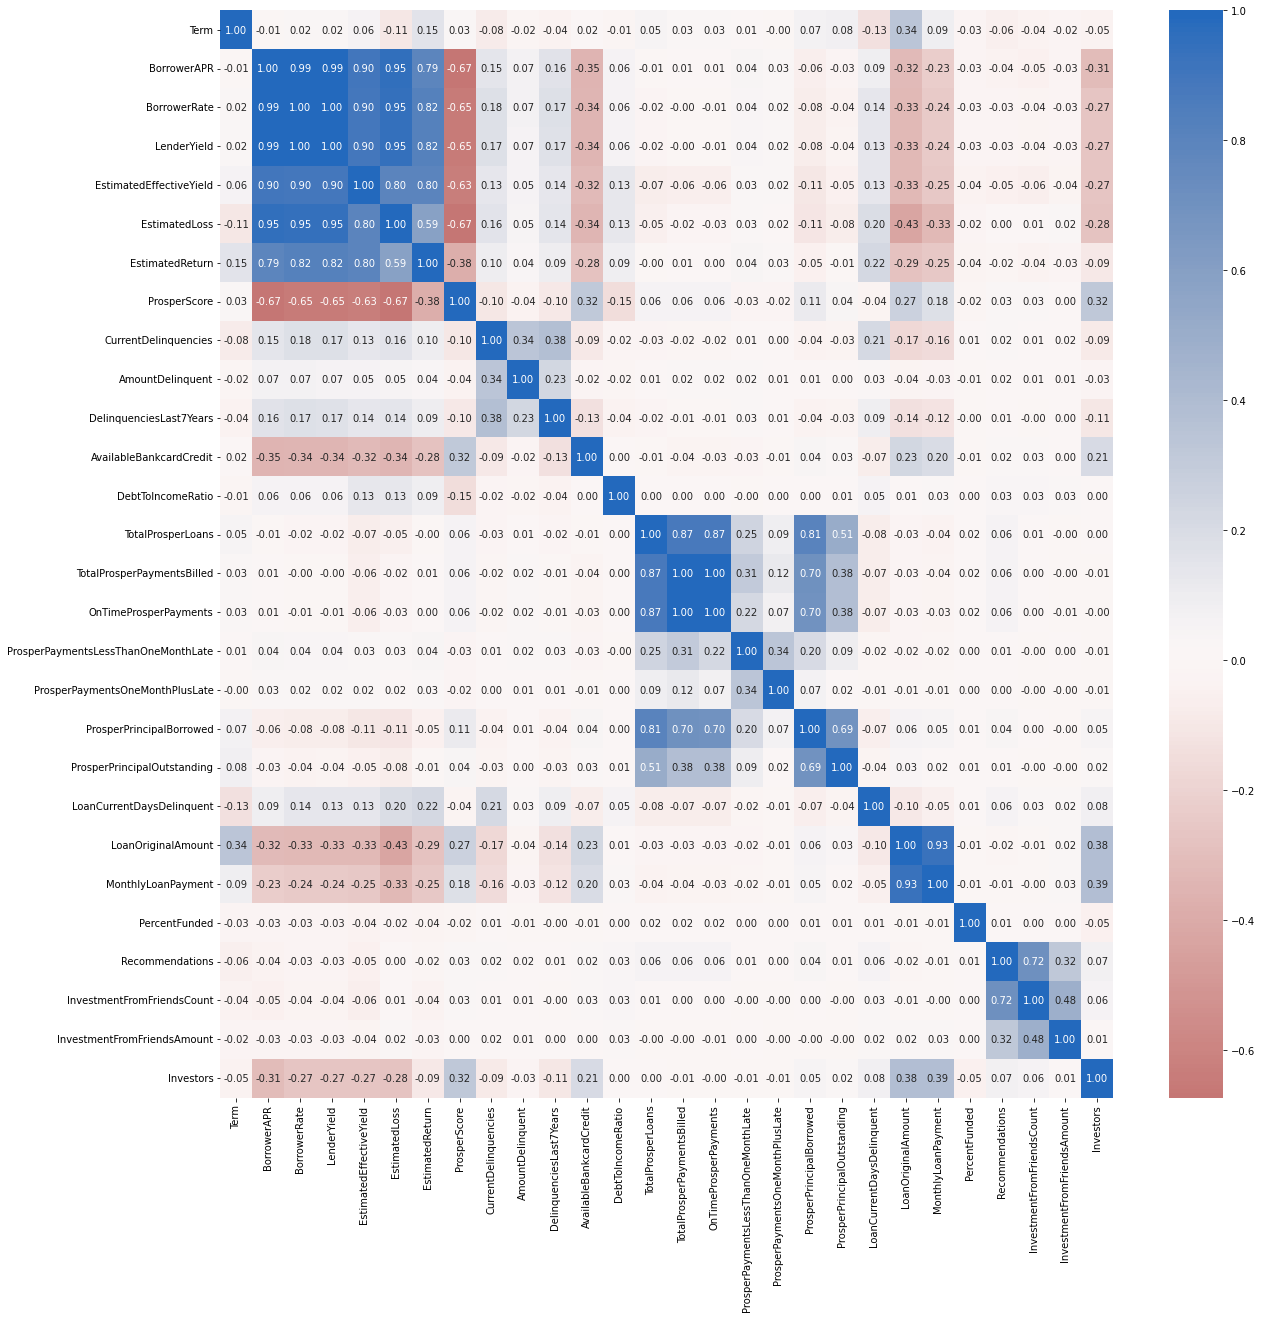

In [175]:
# correlation plot
plt.figure(figsize = [20, 20])
sb.heatmap(df_loan_clean[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

> Observation
>> from the heat map. some great numeric correlation are spotted.
>> To get more details on the correlation, scatter plot will be made for the loan orginal amount and features it has good correlation.

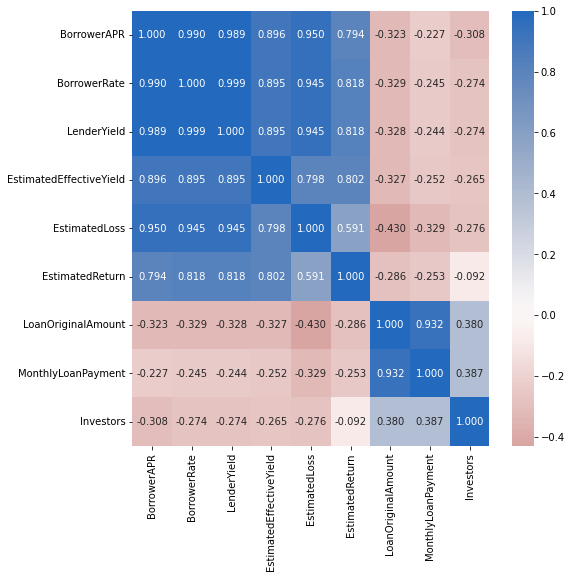

In [178]:
# let's zoom in on the needed correlation from previous heat map
new_numeric_vars = [ 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors']

# correlation plot
plt.figure(figsize = [8, 8])
sb.heatmap(df_loan_clean[new_numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


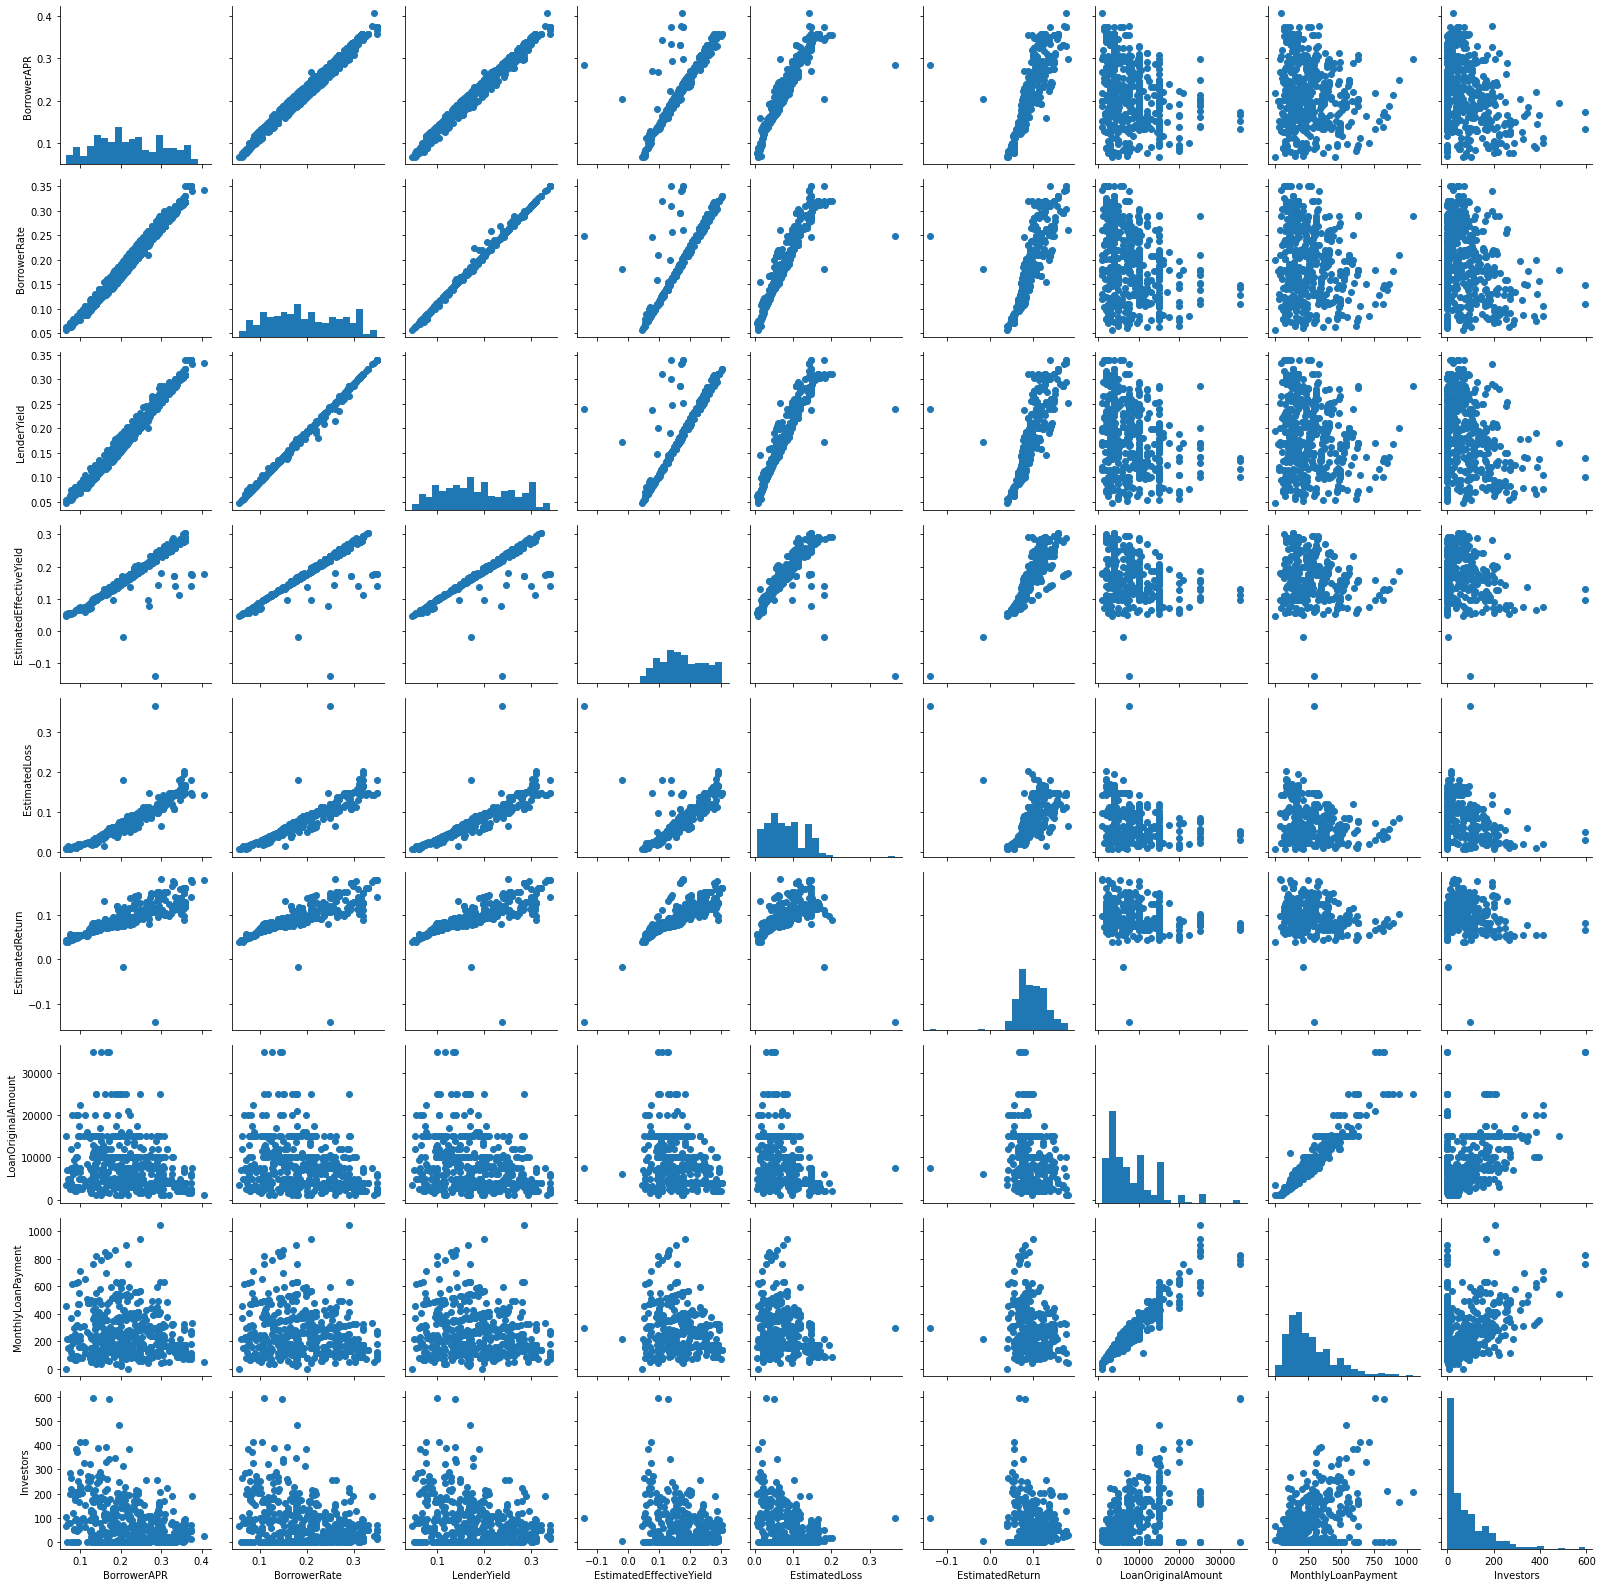

In [169]:
# sample 500 loan records so that plots are clearer and they render faster
loan_samp = df_loan_clean.sample(n=500, replace = False)

g = sb.PairGrid(data = loan_samp, vars = new_numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn' all highly correlated with one another as they are resultant of similar computation values.

There is a strong correlation also between 'LoanOriginalAmount' and 'MonthlyLoanPayment' which is expected. Also the seem to be to be a good relation going on for the number of investors that funded the loan compared to the 'LoanOriginalAmount' and 'MonthlyLoanPayment' which is worth extra exploration in this section.

'ProsperScore' has a very strong negative correlation with 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn'. Further investagtion into this correlation will be needed.

Further investigation will now be done on how 'LoanOriginalAmount' and 'MonthlyLoanPayment' correlate with the Ordinal categorical variables (ProsperRating and IncomeRang).

In [ ]:
# plotting matrix of 'LoanOriginalAmount' and 'MonthlyLoanPayment' against ProsperRating and IncomeRang.
loans_samp = df_loan_clean.sample(n=50000, replace = False)



plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

